In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')
df

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
column_names = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported',]

df.columns = column_names

In [4]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           999 non-null    object 
 13  insured_hobbies     

In [6]:
df = df.dropna()
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
5,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [7]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('------------------------------------')

policy_bind_date
28-04-1992    3
01-01-2006    3
05-08-1992    3
28-12-2002    2
28-12-1991    2
             ..
05-07-2003    1
18-02-1995    1
13-12-2014    1
01-06-1997    1
11-11-1996    1
Name: count, Length: 864, dtype: int64
------------------------------------
policy_state
OH    318
IL    310
IN    280
Name: count, dtype: int64
------------------------------------
policy_csl
100/300     326
250/500     315
500/1000    267
Name: count, dtype: int64
------------------------------------
insured_sex
FEMALE    494
MALE      414
Name: count, dtype: int64
------------------------------------
insured_education_level
High School    146
JD             145
MD             131
Masters        130
Associate      129
PhD            115
College        112
Name: count, dtype: int64
------------------------------------
insured_occupation
machine-op-inspct    87
prof-specialty       77
tech-support         71
sales                70
craft-repair         69
exec-managerial      68
transport-moving 

In [9]:
df=df.replace('?','No Info')

In [10]:
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('-------------------------')

policy_bind_date
28-04-1992    3
01-01-2006    3
05-08-1992    3
28-12-2002    2
28-12-1991    2
             ..
05-07-2003    1
18-02-1995    1
13-12-2014    1
01-06-1997    1
11-11-1996    1
Name: count, Length: 864, dtype: int64
-------------------------
policy_state
OH    318
IL    310
IN    280
Name: count, dtype: int64
-------------------------
policy_csl
100/300     326
250/500     315
500/1000    267
Name: count, dtype: int64
-------------------------
insured_sex
FEMALE    494
MALE      414
Name: count, dtype: int64
-------------------------
insured_education_level
High School    146
JD             145
MD             131
Masters        130
Associate      129
PhD            115
College        112
Name: count, dtype: int64
-------------------------
insured_occupation
machine-op-inspct    87
prof-specialty       77
tech-support         71
sales                70
craft-repair         69
exec-managerial      68
transport-moving     67
priv-house-serv      66
other-service        61


In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,908.000000,908.000000,908.000000,908.000000,908.000000,9.080000e+02,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,204.892070,39.030837,546107.605727,1131.607930,1256.432170,1.089207e+06,500635.000000,24792.290749,-26953.303965,12.070485,1.924009,1.002203,1.481278,57492.114537,8102.643172,8059.449339,41330.022026,2005.126652
std,115.995083,9.192366,256423.285569,612.280474,245.320953,2.279716e+06,71505.151757,27718.645607,28278.950686,7.005077,1.031882,0.824110,1.111572,22786.799195,4617.262759,4552.473954,16258.336157,6.016189
min,0.000000,19.000000,100804.000000,500.000000,484.670000,-1.000000e+06,430141.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,337547.250000,500.000000,1089.607500,0.000000e+00,448137.250000,0.000000,-51800.000000,6.000000,1.000000,0.000000,0.000000,48045.000000,5255.000000,5332.500000,34357.500000,2000.000000
50%,201.500000,38.000000,533135.000000,1000.000000,1257.020000,0.000000e+00,466391.500000,0.000000,-22350.000000,13.000000,1.000000,1.000000,1.000000,60200.000000,7180.000000,7115.000000,43650.000000,2005.000000
75%,277.250000,45.000000,757918.000000,2000.000000,1415.695000,0.000000e+00,603005.250000,50400.000000,0.000000,18.000000,3.000000,2.000000,2.000000,72105.000000,11700.000000,11230.000000,51612.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [12]:
df['umbrella_limit'].value_counts()

umbrella_limit
 0           725
 6000000      50
 5000000      43
 4000000      37
 7000000      24
 3000000      11
 8000000       8
 9000000       4
 2000000       3
 10000000      2
-1000000       1
Name: count, dtype: int64

In [13]:
df.loc[df['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
289,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [14]:
df.drop(df[df['umbrella_limit'] == -1000000].index, inplace=True)
for index, row in df.iterrows():
    incident_date = row['incident_date']
    incident_date_parts = incident_date.split('-')
    df.loc[index, 'incident_Date'] = incident_date_parts[0]
    df.loc[index, 'incident_Month'] = incident_date_parts[1]
    df.loc[index, 'incident_Year'] = incident_date_parts[2]
df.drop('incident_Year', axis=1, inplace=True)
for index, row in df.iterrows():
    policy_bind_date = row['policy_bind_date']
    policy_bind_date_parts = policy_bind_date.split('-')
    df.loc[index, 'policy_bind_Date'] = policy_bind_date_parts[0]
    df.loc[index, 'policy_bind_Month'] = policy_bind_date_parts[1]
    df.loc[index, 'policy_bind_Year'] = policy_bind_date_parts[2]
df.drop('policy_bind_date', axis=1, inplace=True)
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
1,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
2,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,256,39,104594,OH,250/500,1000,1351.10,0,478456,FEMALE,...,51280,Saab,95,2003,Y,02,01,12,10,2006
5,137,34,413978,IN,250/500,1000,1333.35,0,441716,MALE,...,50050,Nissan,Pathfinder,2012,N,13,01,04,06,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,61040,Honda,Accord,2006,N,22,02,16,07,1991
995,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,72320,Volkswagen,Passat,2015,N,24,01,05,01,2014
996,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,52500,Suburu,Impreza,1996,N,23,01,17,02,2003
997,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,36540,Audi,A5,1998,N,26,02,18,11,2011


In [15]:
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
1,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
2,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,51280,Saab,95,2003,Y,02,01,12,10,2006
5,137,34,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,...,50050,Nissan,Pathfinder,2012,N,13,01,04,06,2000


In [16]:
df.shape

(907, 40)

In [17]:
df['fraud_reported'].value_counts()

fraud_reported
N    667
Y    240
Name: count, dtype: int64

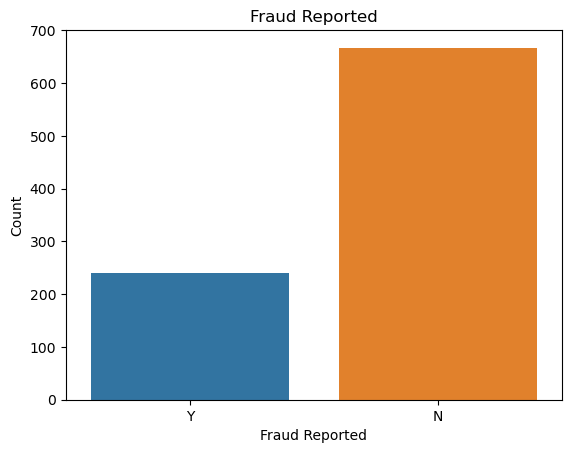

In [18]:
if 'fraud_reported' in df.columns:
    fraud_counts = df['fraud_reported'].value_counts()
    
    sns.countplot(x='fraud_reported', data=df)
    plt.title('Fraud Reported')
    plt.xlabel('Fraud Reported')
    plt.ylabel('Count')
    plt.show()
else:
    print("The 'fraud_reported' column does not exist in the DataFrame.")

<Axes: xlabel='fraud_reported', ylabel='total_claim_amount'>

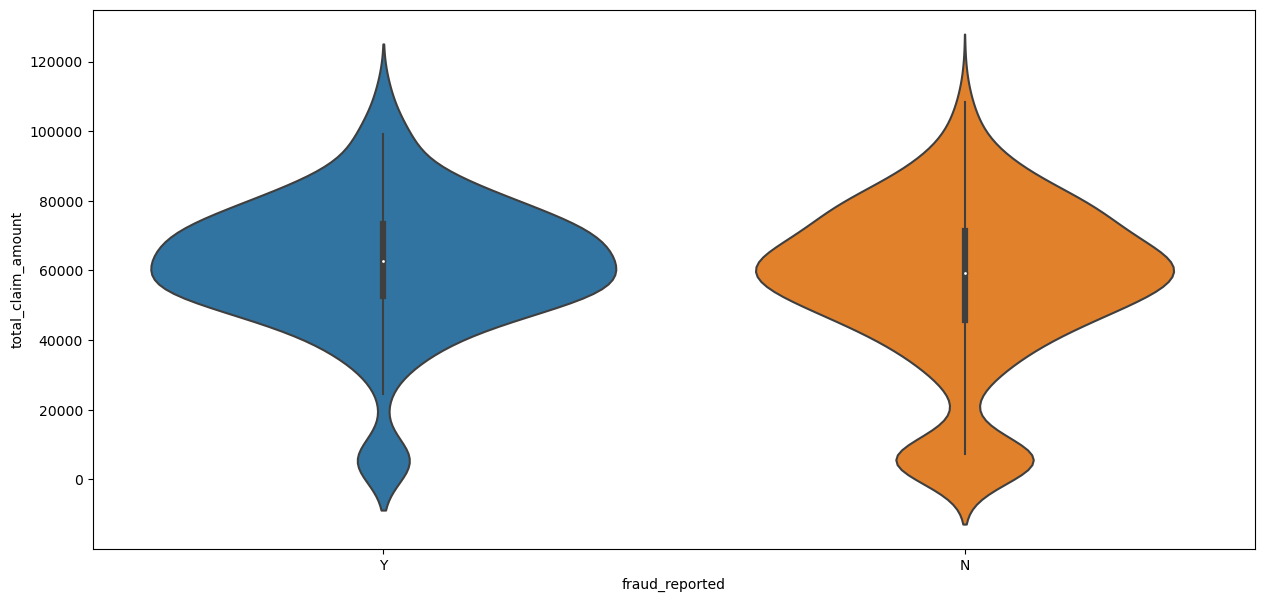

In [19]:
plt.figure(figsize=(15,7))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=df)

### most of fraud reported found  total claimed amount 50000 to 70000

<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

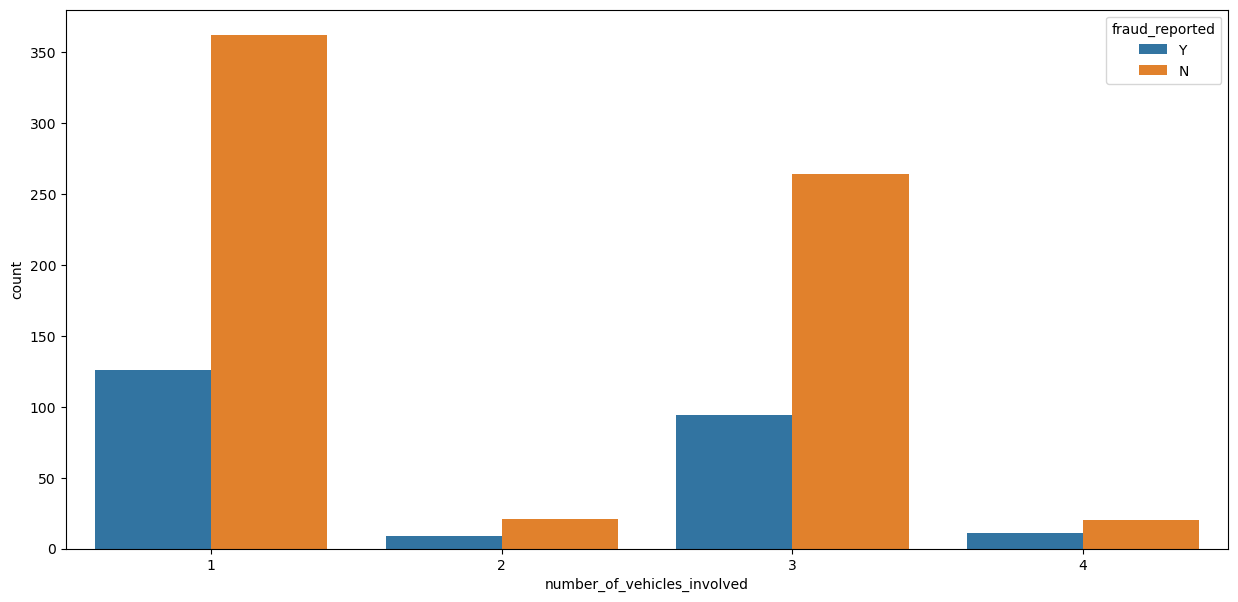

In [20]:
plt.figure(figsize=(15,7))

sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

<Axes: xlabel='incident_city', ylabel='count'>

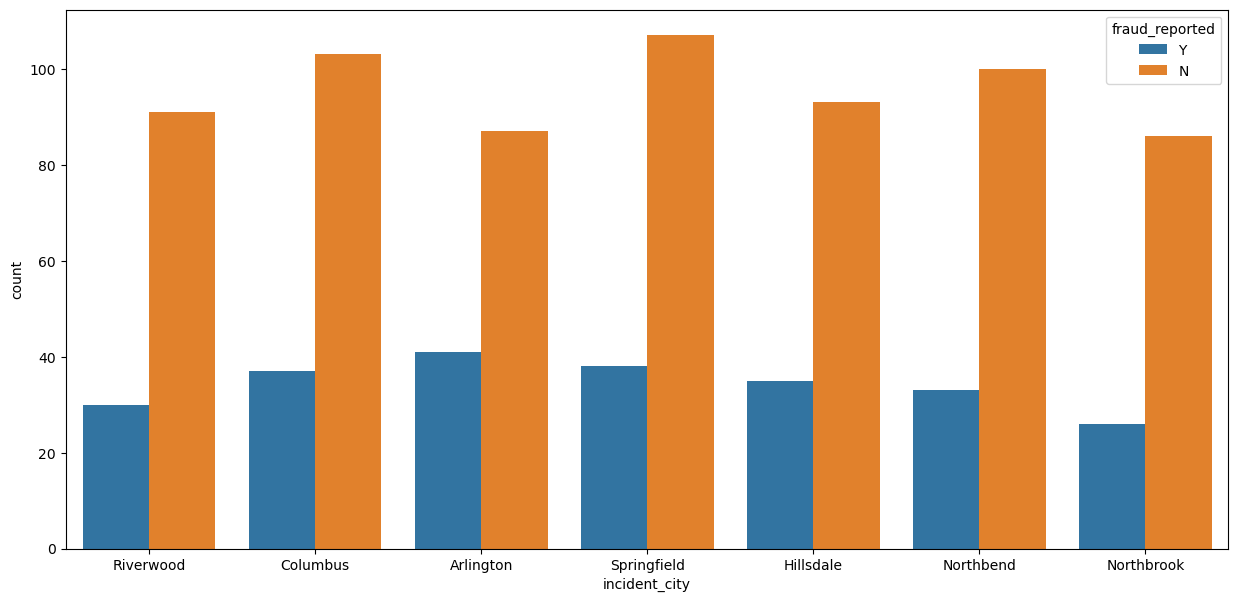

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

<Axes: xlabel='incident_state', ylabel='count'>

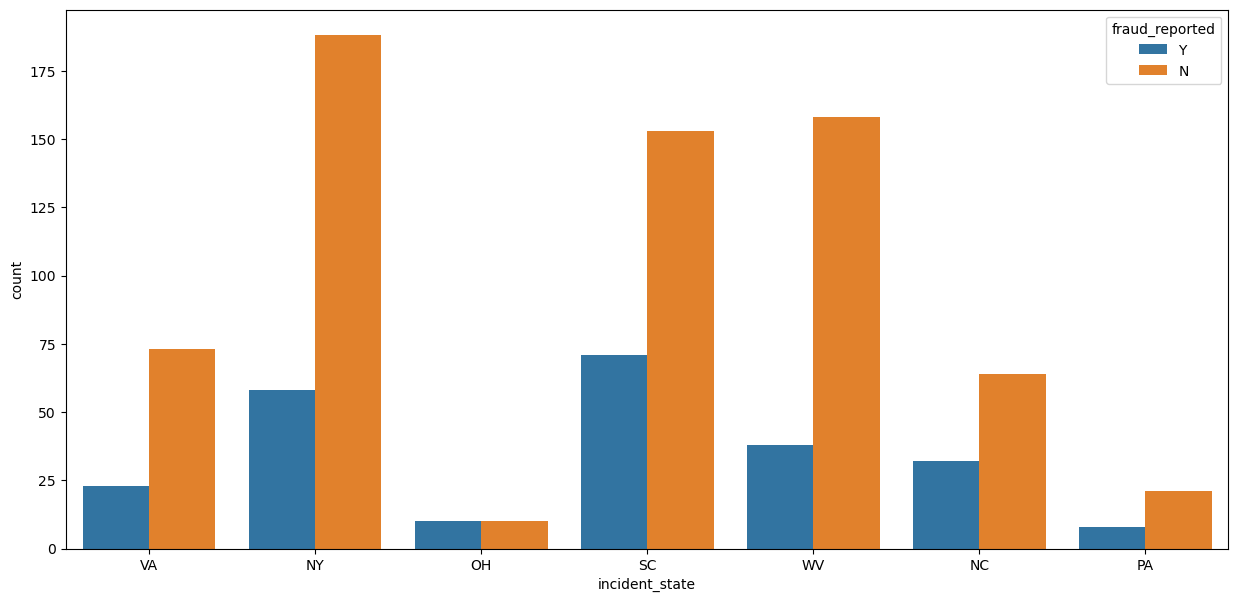

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

<Axes: xlabel='authorities_contacted', ylabel='count'>

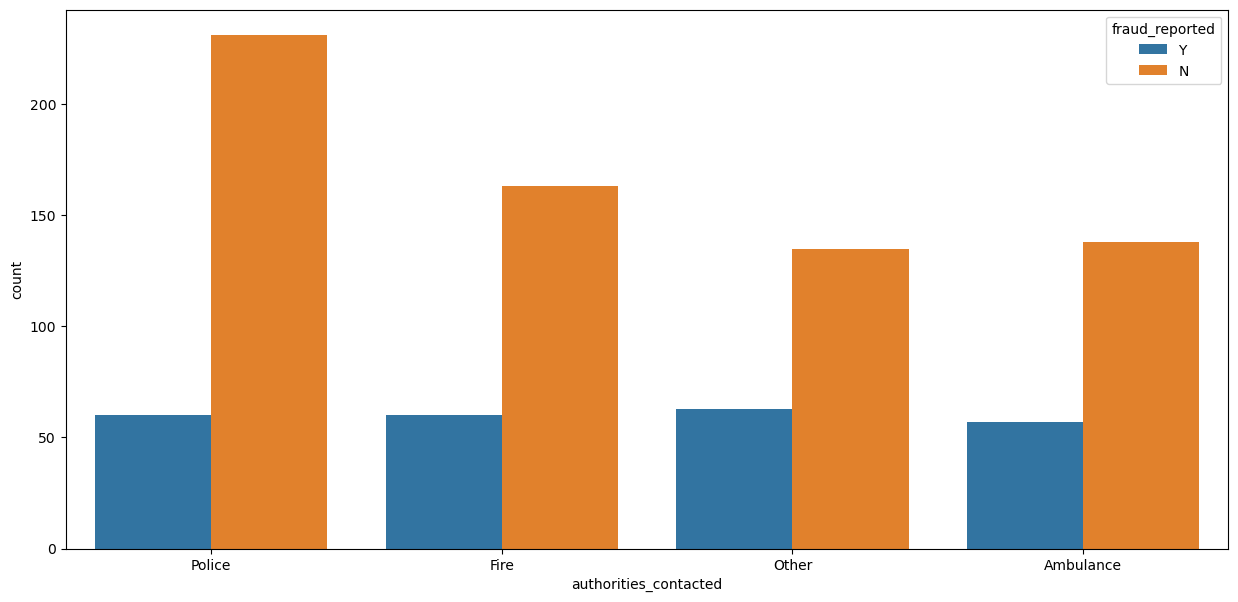

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

<Axes: xlabel='incident_severity', ylabel='count'>

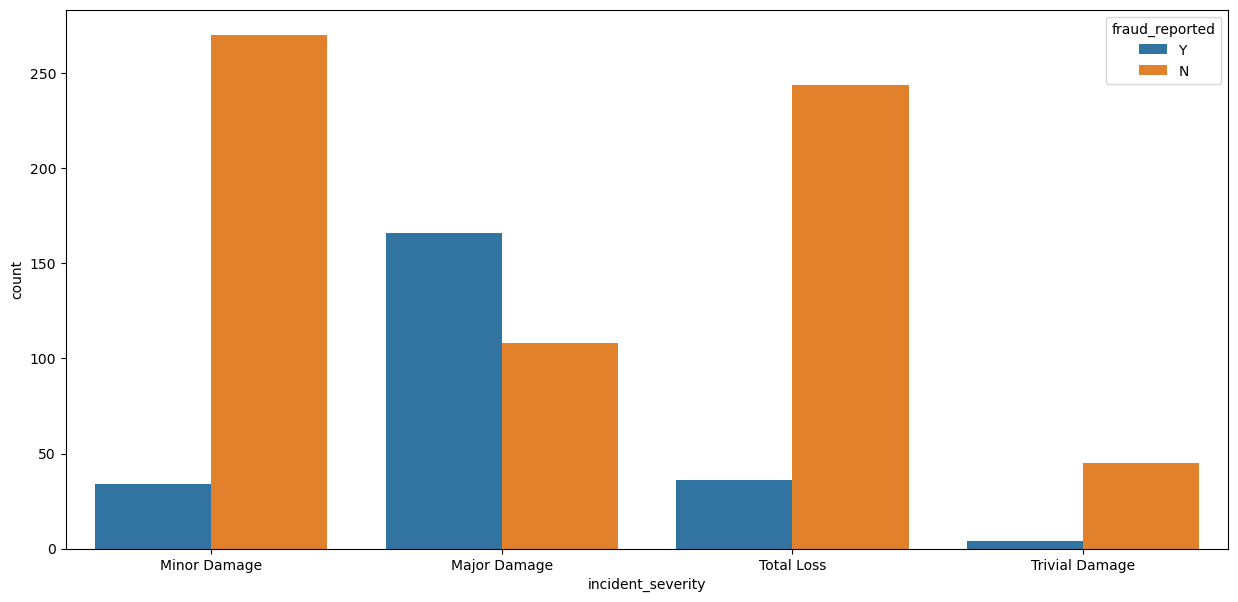

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

<Axes: xlabel='collision_type', ylabel='count'>

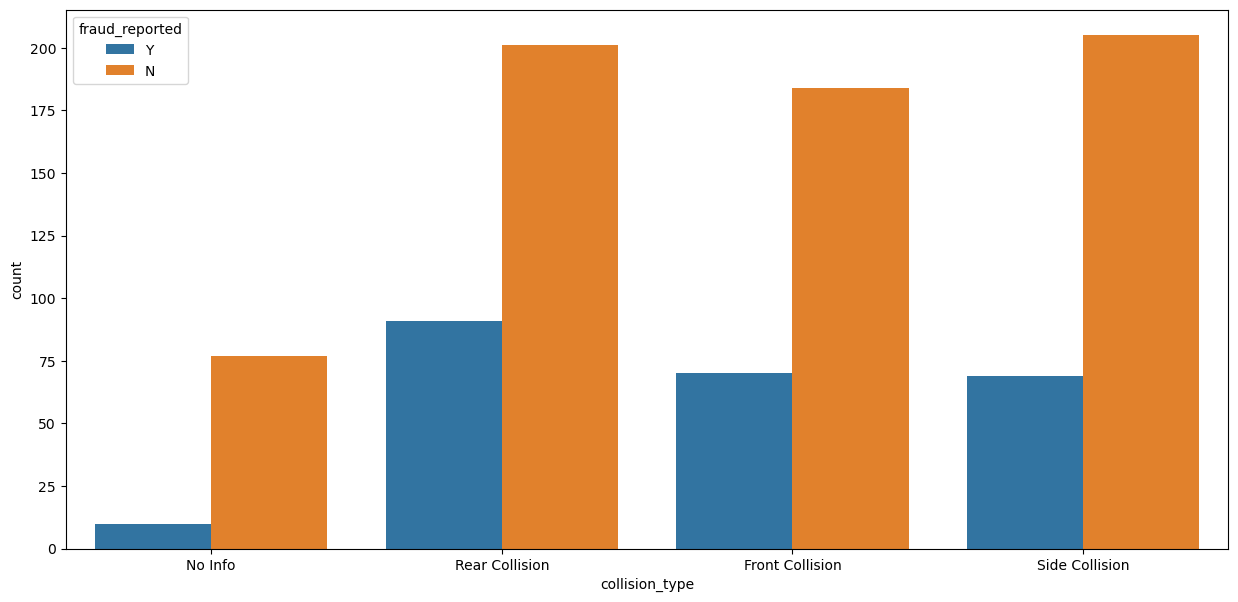

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

<Axes: xlabel='incident_type', ylabel='count'>

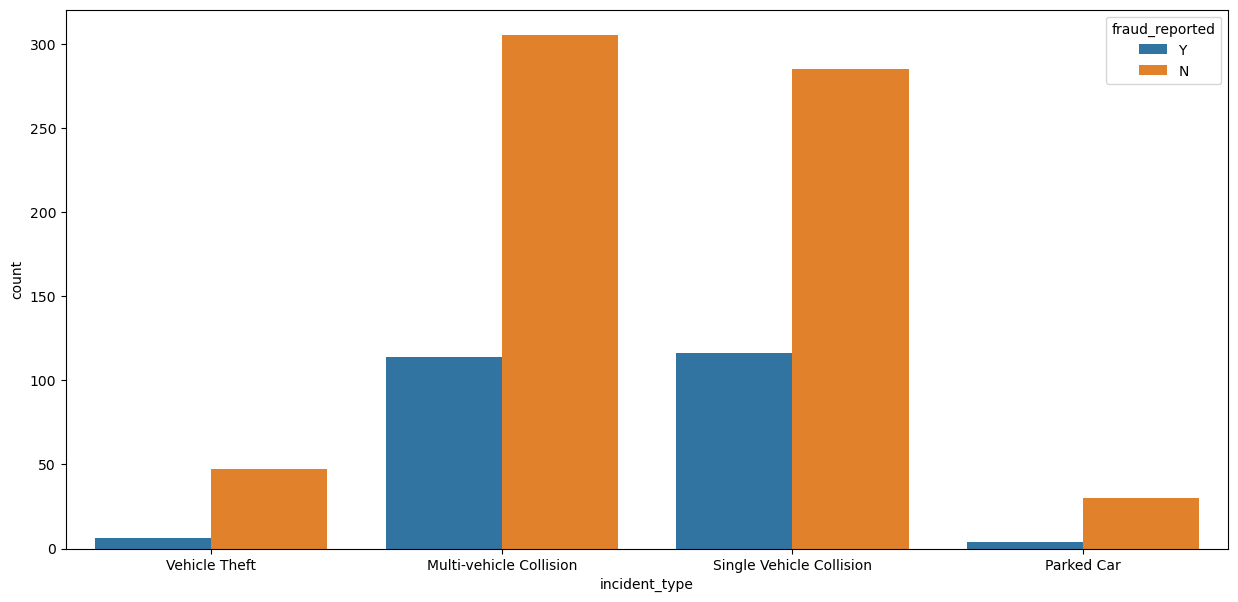

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

<Axes: xlabel='incident_Month', ylabel='count'>

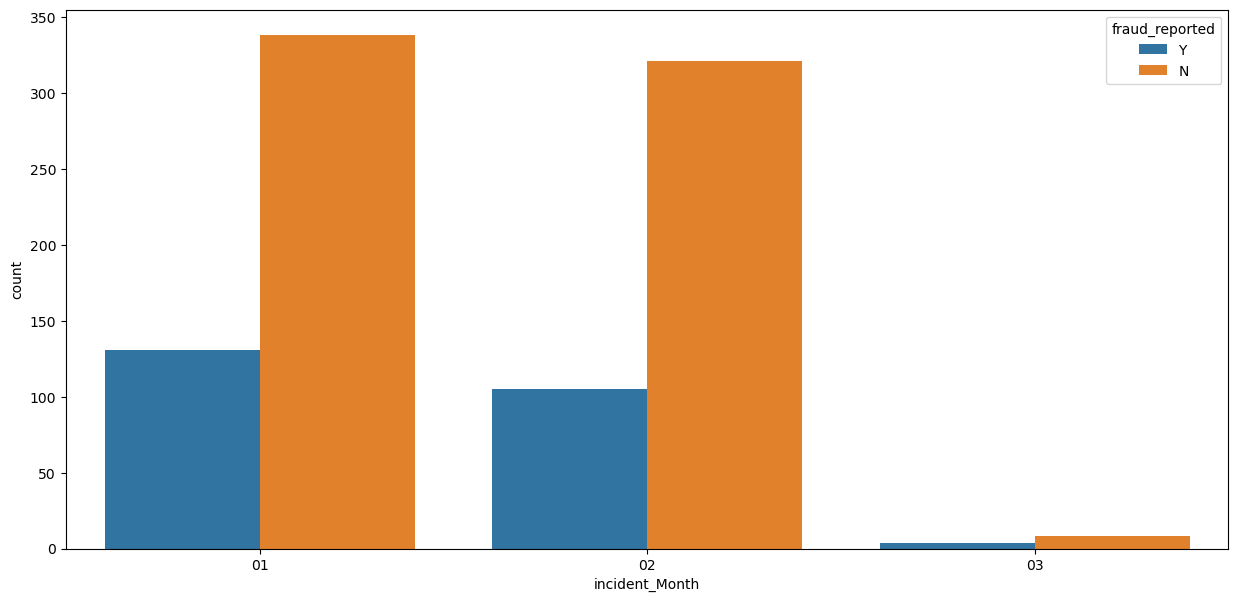

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)

# skewness 



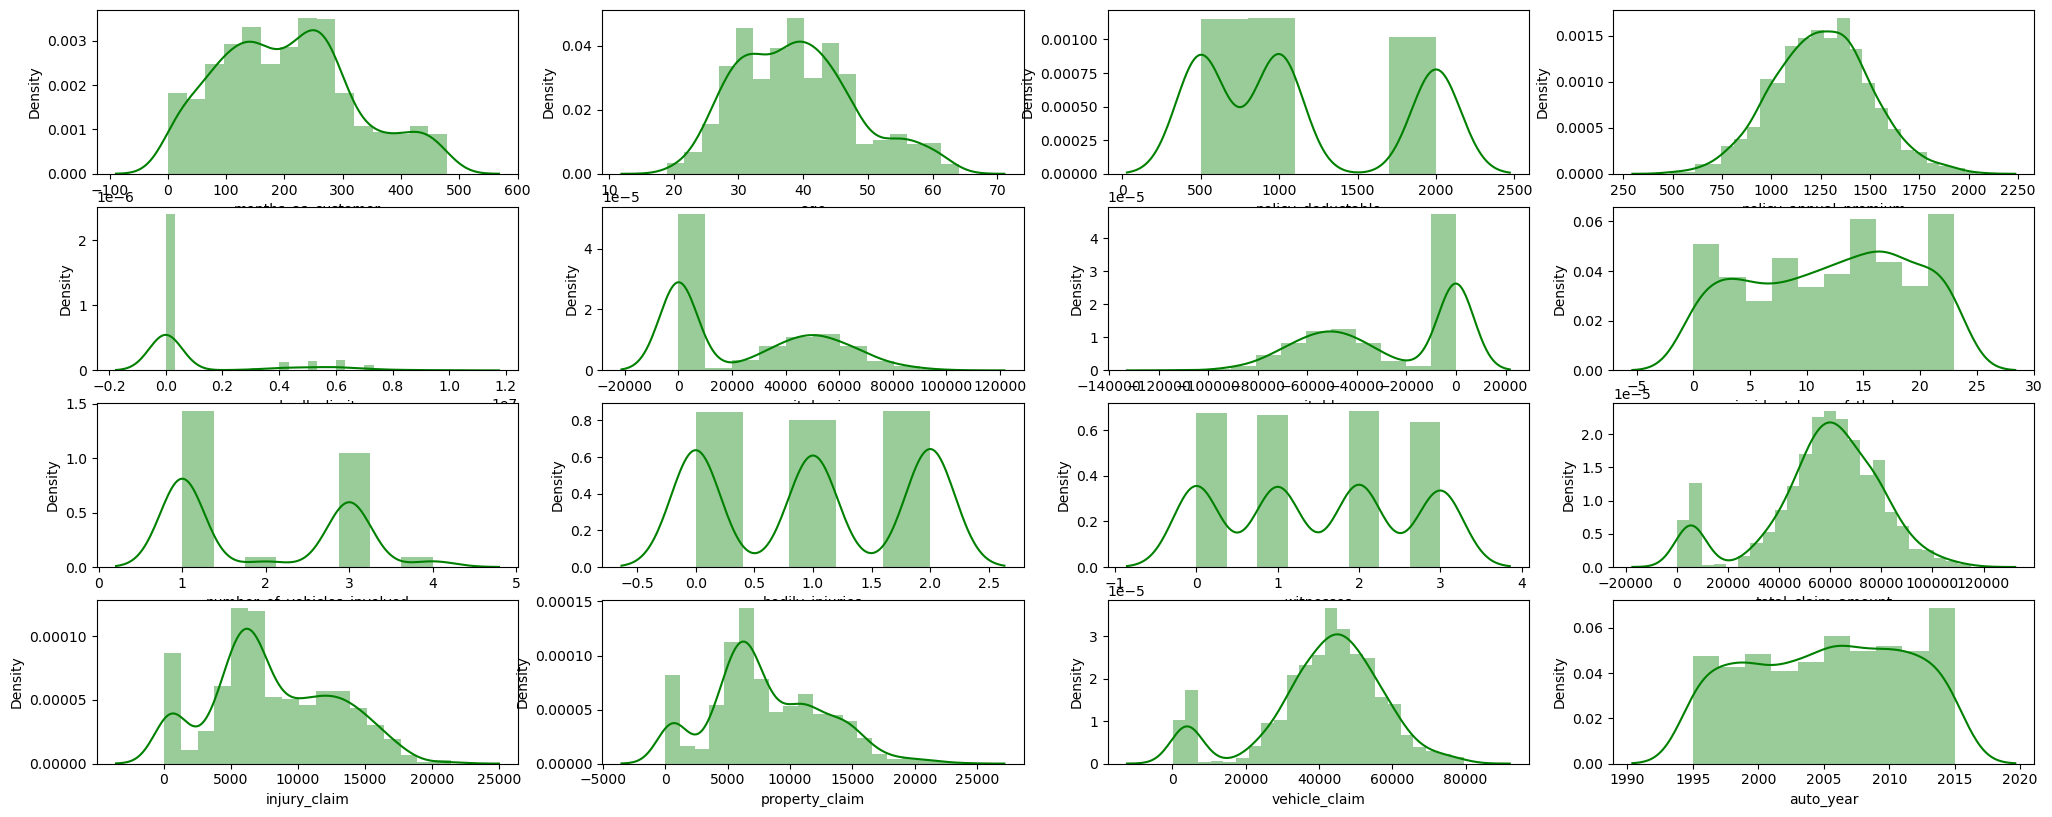

In [28]:
plt.figure(figsize=(25,20))
for i in enumerate(df.select_dtypes(include=['int64', 'float', 'int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [29]:
df.select_dtypes(include=['int64', 'float', 'int32']).skew()

months_as_customer             0.349055
age                            0.464514
policy_deductable              0.486067
policy_annual_premium          0.041225
umbrella_limit                 1.820848
capital-gains                  0.487063
capital-loss                  -0.389265
incident_hour_of_the_day      -0.146625
number_of_vehicles_involved    0.337573
bodily_injuries               -0.006137
witnesses                      0.014502
total_claim_amount            -0.746277
injury_claim                   0.211135
property_claim                 0.370373
vehicle_claim                 -0.784102
auto_year                     -0.073160
dtype: float64

In [30]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit', 'total_claim_amount', 'vehicle_claim']] = power_transform(
    df[['umbrella_limit', 'total_claim_amount', 'vehicle_claim']], method='yeo-johnson'
)

# outlier 

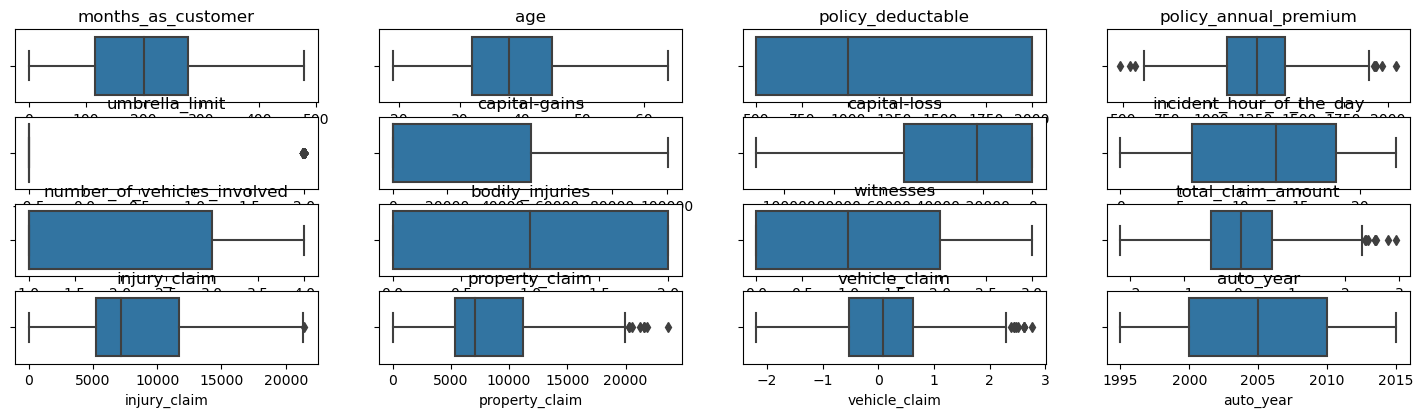

In [31]:
plt.figure(figsize=(18,10))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float', 'int32']).columns):
    plt.subplot(9, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.show()

In [32]:
from scipy.stats import zscore

z=np.abs(zscore(df.select_dtypes(include=['int64','float','int32'])))

print(np.where(z>3))

(array([200, 446, 534, 695], dtype=int64), array([ 3, 13, 13,  3], dtype=int64))


In [33]:
df_1=df[(z<3).all(axis=1)]
print(('with outliers::',df.shape))
print('after removing outliers::',df_1.shape)

('with outliers::', (907, 40))
after removing outliers:: (903, 40)


In [35]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'incident_Date',
       'incident_Month', 'policy_bind_Date', 'policy_bind_Month',
       'policy_bind_Year'],
      dtype='object')

In [36]:
df.shape

(907, 40)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           907 non-null    int64  
 1   age                          907 non-null    int64  
 2   policy_state                 907 non-null    object 
 3   policy_csl                   907 non-null    object 
 4   policy_deductable            907 non-null    int64  
 5   policy_annual_premium        907 non-null    float64
 6   umbrella_limit               907 non-null    float64
 7   insured_sex                  907 non-null    object 
 8   insured_education_level      907 non-null    object 
 9   insured_occupation           907 non-null    object 
 10  insured_hobbies              907 non-null    object 
 11  insured_relationship         907 non-null    object 
 12  capital-gains                907 non-null    int64  
 13  capital-loss             

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categ_data = df.select_dtypes(exclude=['int64', 'float', 'int32']).columns

for val in categ_data:
    df[val] = le.fit_transform(df[val].astype(str))

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           907 non-null    int64  
 1   age                          907 non-null    int64  
 2   policy_state                 907 non-null    int32  
 3   policy_csl                   907 non-null    int32  
 4   policy_deductable            907 non-null    int64  
 5   policy_annual_premium        907 non-null    float64
 6   umbrella_limit               907 non-null    float64
 7   insured_sex                  907 non-null    int32  
 8   insured_education_level      907 non-null    int32  
 9   insured_occupation           907 non-null    int32  
 10  insured_hobbies              907 non-null    int32  
 11  insured_relationship         907 non-null    int32  
 12  capital-gains                907 non-null    int64  
 13  capital-loss             

In [39]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [40]:
x.shape

(907, 39)

In [41]:
y.shape

(907,)

In [42]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [43]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

In [44]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,...,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,0.427568,0.445057,0.503859,0.468026,0.421536,0.493737,0.200347,0.455347,0.496692,0.516920,...,0.340070,0.441658,0.502417,0.506122,0.506836,0.463322,0.248071,0.482764,0.501854,0.465535
std,0.242232,0.204376,0.415931,0.402904,0.408172,0.157040,0.400088,0.498277,0.324366,0.307149,...,0.192016,0.202234,0.310669,0.293199,0.300593,0.287960,0.263036,0.293884,0.320949,0.295770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241127,0.288889,0.000000,0.000000,0.000000,0.386786,0.000000,0.000000,0.166667,0.230769,...,0.224968,0.335629,0.230769,0.250000,0.250000,0.216667,0.000000,0.233333,0.181818,0.200000
50%,0.419624,0.422222,0.500000,0.500000,0.333333,0.494158,0.000000,0.000000,0.500000,0.538462,...,0.300380,0.457929,0.538462,0.526316,0.500000,0.466667,0.000000,0.466667,0.545455,0.480000
75%,0.578288,0.577778,1.000000,1.000000,1.000000,0.595705,0.000000,1.000000,0.833333,0.769231,...,0.473173,0.569386,0.769231,0.763158,0.750000,0.700000,0.500000,0.733333,0.818182,0.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='fraud_reported', ylabel='count'>

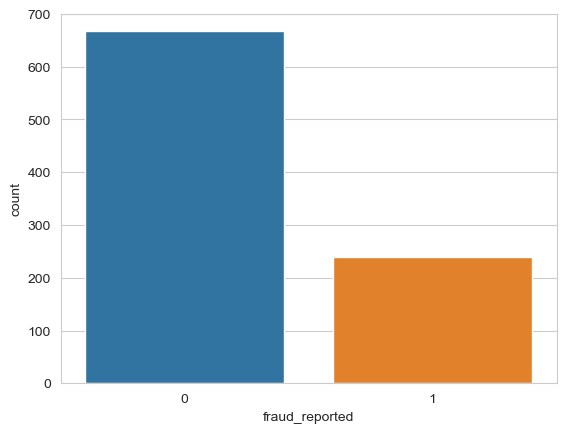

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='fraud_reported',data=df)

In [46]:
import pandas as pd
from imblearn.over_sampling import BorderlineSMOTE
import seaborn as sns




# Perform Borderline SMOTE resampling
x_rus, y_rus = BorderlineSMOTE().fit_resample(x, y)

# Print the original and resampled dataset shapes
print('Original Target dataset shape:', y.shape)
print('Resample Target dataset shape', y_rus.shape)




Original Target dataset shape: (907,)
Resample Target dataset shape (1334,)


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [49]:
x_train.shape

(973, 39)

In [50]:
y_train.shape

(973,)

In [51]:
x_test.shape

(361, 39)

In [52]:
y_test.shape

(361,)

In [54]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")


In [55]:
logreg = LogisticRegression()

logreg_score = cross_val_score(logreg, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for logreg:", np.mean(logreg_score)*100)

logreg.fit(x_train, y_train)

LR_predicted = logreg.predict(x_test)

print("Training accuracy::", logreg.score(x_train, y_train)*100)
print("Test accuracy::", logreg.score(x_test, y_test)*100)
print("Accuracy score for logreg:", accuracy_score(y_test, LR_predicted)*100)
print("Confusion matrix for logreg:")
print(confusion_matrix(y_test, LR_predicted))
print("Classification report for logreg:")
print(classification_report(y_test, LR_predicted))

Cross validation score for logreg: 74.96381402945566
Training accuracy:: 76.56731757451182
Test accuracy:: 73.40720221606648
Accuracy score for logreg: 73.40720221606648
Confusion matrix for logreg:
[[121  51]
 [ 45 144]]
Classification report for logreg:
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       172
           1       0.74      0.76      0.75       189

    accuracy                           0.73       361
   macro avg       0.73      0.73      0.73       361
weighted avg       0.73      0.73      0.73       361



In [56]:
dtc = DecisionTreeClassifier()

# Perform cross-validation
dtc_score = cross_val_score(dtc, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for dtc:", np.mean(dtc_score)*100)

# Train the model
dtc.fit(x_train, y_train)

# Make predictions
predicted_dtc = dtc.predict(x_test)

# Evaluate the model
print("Training accuracy::", dtc.score(x_train, y_train)*100)
print("Test accuracy::", dtc.score(x_test, y_test)*100)
print("Accuracy score for dtc:", accuracy_score(y_test, predicted_dtc)*100)
print("Confusion matrix for dtc:")
print(confusion_matrix(y_test, predicted_dtc))
print("Classification report for dtc:")
print(classification_report(y_test, predicted_dtc))

Cross validation score for dtc: 81.11514741910956
Training accuracy:: 100.0
Test accuracy:: 81.16343490304709
Accuracy score for dtc: 81.16343490304709
Confusion matrix for dtc:
[[143  29]
 [ 39 150]]
Classification report for dtc:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       172
           1       0.84      0.79      0.82       189

    accuracy                           0.81       361
   macro avg       0.81      0.81      0.81       361
weighted avg       0.81      0.81      0.81       361



In [57]:
rfc = RandomForestClassifier()


# Perform cross-validation
rfc_score = cross_val_score(rfc, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for rfc:", np.mean(rfc_score))

# Train the model
rfc.fit(x_train, y_train)

# Make predictions
predicted_rfc = rfc.predict(x_test)

# Evaluate the model
print("Training accuracy::", rfc.score(x_train, y_train))
print("Test accuracy::", rfc.score(x_test, y_test))
print("Accuracy score for rfc:", accuracy_score(y_test, predicted_rfc))
print("Confusion matrix for rfc:")
print(confusion_matrix(y_test, predicted_rfc))
print("Classification report for rfc:")
print(classification_report(y_test, predicted_rfc))

Cross validation score for rfc: 0.8523781363521163
Training accuracy:: 1.0
Test accuracy:: 0.8698060941828255
Accuracy score for rfc: 0.8698060941828255
Confusion matrix for rfc:
[[150  22]
 [ 25 164]]
Classification report for rfc:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       172
           1       0.88      0.87      0.87       189

    accuracy                           0.87       361
   macro avg       0.87      0.87      0.87       361
weighted avg       0.87      0.87      0.87       361



In [58]:
adb = AdaBoostClassifier()

# Perform cross-validation
adb_score = cross_val_score(adb, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for adb:", np.mean(adb_score))

# Train the model
adb.fit(x_train, y_train)

# Make predictions
predicted_adb = adb.predict(x_test)

# Evaluate the model
print("Training accuracy::", adb.score(x_train, y_train))
print("Test accuracy::", adb.score(x_test, y_test))
print("Accuracy score for adb:", accuracy_score(y_test, predicted_adb))
print("Confusion matrix for adb:")
print(confusion_matrix(y_test, predicted_adb))
print("Classification report for adb:")
print(classification_report(y_test, predicted_adb))

Cross validation score for adb: 0.8381487426431248
Training accuracy:: 0.895169578622816
Test accuracy:: 0.8421052631578947
Accuracy score for adb: 0.8421052631578947
Confusion matrix for adb:
[[148  24]
 [ 33 156]]
Classification report for adb:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       172
           1       0.87      0.83      0.85       189

    accuracy                           0.84       361
   macro avg       0.84      0.84      0.84       361
weighted avg       0.84      0.84      0.84       361



In [59]:
grbc = GradientBoostingClassifier()

# Perform cross-validation
grbc_score = cross_val_score(grbc, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for grbc:", np.mean(grbc_score))

# Train the model
grbc.fit(x_train, y_train)

# Make predictions
predicted_grbc = grbc.predict(x_test)

# Evaluate the model
print("Training accuracy::", grbc.score(x_train, y_train))
print("Test accuracy::", grbc.score(x_test, y_test))
print("Accuracy score for grbc:", accuracy_score(y_test, predicted_grbc))
print("Confusion matrix for grbc:")
print(confusion_matrix(y_test, predicted_grbc))
print("Classification report for grbc:")
print(classification_report(y_test, predicted_grbc))

Cross validation score for grbc: 0.8568697023457521
Training accuracy:: 0.9732785200411099
Test accuracy:: 0.8947368421052632
Accuracy score for grbc: 0.8947368421052632
Confusion matrix for grbc:
[[150  22]
 [ 16 173]]
Classification report for grbc:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       172
           1       0.89      0.92      0.90       189

    accuracy                           0.89       361
   macro avg       0.90      0.89      0.89       361
weighted avg       0.90      0.89      0.89       361

